In [45]:
import cv2
import torch
from torchvision import transforms
from PIL import Image, ImageDraw
import numpy as np
from torch_snippets import *
from torchvision.datasets import MNIST  
device = 'cuda:0'

In [46]:

model = torch.load('../public/models/model.pt', map_location=device)
checkpoint = torch.load('../public/weights/weight.pt', map_location=device)
model.load_state_dict(checkpoint)
model.to(device)
model.eval()

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=64, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=64, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=128, out_features=784, bias=True)
    (5): Tanh()
  )
)

In [47]:
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize([0.5], [0.5]),
    transforms.Lambda(lambda x: x.to(device))
])

In [48]:
trn_ds = MNIST('../public/content/', transform=transform, train=True, download=True)
val_ds = MNIST('../public/content/', transform=transform, train=False, download=True)

batch_size = 256 
trn_dl = DataLoader(trn_ds, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

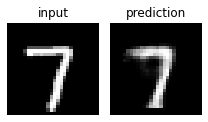

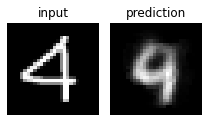

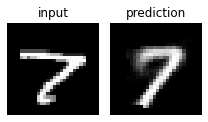

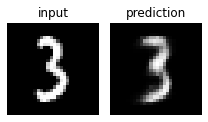

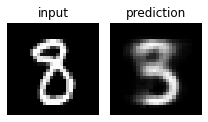

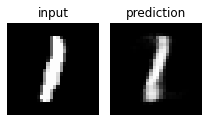

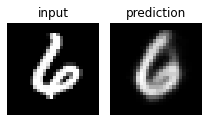

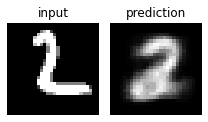

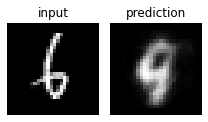

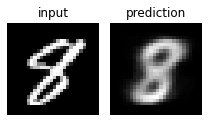

In [49]:
for _ in range(10):
    ix = np.random.randint(len(val_ds))
    im, _ = val_ds[ix]
    _im = model(im[None])[0]
    fig, ax = plt.subplots(1, 2, figsize=(3,3))
    show(im[0], ax=ax[0], title='input')
    show(_im[0], ax=ax[1], title='prediction')
    plt.tight_layout()
    plt.show()